In [430]:
import pandas as pd
import numpy as np

In [431]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [432]:
ufo = pd.read_csv("scrubbed.csv", low_memory=False)

In [433]:
ufo.head(3)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667


Hint for later : Maybe should stransform the datetime column to datetime object in order to extract more data like days of weeks, or months, but this will come later in the feature creation.


Anyway let's first explore the data in the columns

In [434]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [435]:
ufo.isna().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

Many missing values in State, Country and Shape. Missing values in comments are not relevant, even the column of comments doesn't give much details, so maybe we can drop it.

Meanwhile let's explore the missing values:

Shape with NaN can be filled with Unspecified

In [436]:
ufo["shape"] = ufo["shape"].fillna("Unspecified")

Work on Country NaN:

First let's get all the Countries, US=USA, NAN, GB= great britain, CA=canada, AU=autralia, DE=Germany

In [437]:
ufo["country"].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [438]:
ufo["country"].value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

Most of the data is located in the US, so we limit the analysis to the US. So we drop everything except for US and NaN at first (because NaN can still be the US)

In [439]:
ufo = ufo[~ufo['country'].isin(['gb', 'ca', 'au', 'de'])]

In [440]:
ufo["country"].value_counts()

us    65114
Name: country, dtype: int64

We still hava almost 10k missing countries. One way to identify if US is by checking the state, and a more precise way is with latitude and longitude, which can be performed for a more detailed analysis.

In [441]:
ufo["country"].isna().sum()

9670

In [442]:
#68 States, les't get US states, and only focure on those.
len(ufo["state"].unique())

68

US has 50 states, but we see 68, some are not belonging to us, as seen later by a simple glance in the data some states belonged to Canada like Alberta..

In [443]:
#created a csv file with excel where I copied a states abbreviations from internet
us_states = pd.read_csv("us_states.csv")

In [444]:
states=us_states["States"].to_numpy()
states

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [445]:
#need to transform ufo["state"] to capital first in order to use isin()
ufo["state"] = ufo["state"].str.upper()

In [446]:
#we've got all US states, and filled all NaN countries with US since we filtered by US states.
ufo["country"] = ufo[ufo["state"].isin(states)]["country"].fillna("us")

In [447]:
#Managed to reduce the NaN values from 9670 to 4000.
ufo["country"].isna().sum()

3988

In [448]:
ufo.isna().sum()

datetime                   0
city                       0
state                   3256
country                 3988
shape                      0
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

We still see some missing values. But we will drop those as majority has already been cleaned. Although it would be possible to extract more data from Latitude, Longitude and even city labels (as some cities contains US cities in parenthesis).

In [449]:
ufo = ufo.dropna()

In [450]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70783 entries, 0 to 80331
Data columns (total 11 columns):
datetime                70783 non-null object
city                    70783 non-null object
state                   70783 non-null object
country                 70783 non-null object
shape                   70783 non-null object
duration (seconds)      70783 non-null object
duration (hours/min)    70783 non-null object
comments                70783 non-null object
date posted             70783 non-null object
latitude                70783 non-null object
longitude               70783 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.5+ MB


In [451]:
#Need to reset index, noticed that after dropping data, the indexes don't follow normal order
#example 0,1,3...
ufo = ufo.reset_index(drop=True)


In [452]:
ufo["city"] = ufo["city"].str.capitalize()
ufo["country"] = ufo["country"].str.upper()

In [453]:
#ufo["datetime"] = pd.to_datetime(ufo["datetime"]) #gives error ValueError: hour must be in 0..23, because of hour format
ufo[['date','time']] = ufo['datetime'].str.split(expand=True) #splits in date and time on empty space i think
ufo['datetime'] = (pd.to_datetime(ufo.pop('date'), format='%m/%d/%Y') + 
                   pd.to_timedelta(ufo.pop('time') + ':00'))



FEATURE CREATION

In [454]:
ufo["Hour"] = ufo["datetime"].apply(lambda stamp: stamp.hour)
ufo["Month"] = ufo["datetime"].apply(lambda stamp: stamp.month)
ufo["Year"] = ufo["datetime"].apply(lambda stamp: stamp.year)
ufo["Day of week"] = ufo["datetime"].apply(lambda stamp: stamp.weekday())

In [455]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
ufo["Day of week"] = ufo["Day of week"].map(dmap)

In [456]:
#just to see the new features
ufo.head(3)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Hour,Month,Year,Day of week
0,1949-10-10 20:30:00,San marcos,TX,US,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,20,10,1949,Mon
1,1949-10-10 21:00:00,Lackland afb,TX,US,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,21,10,1949,Mon
2,1956-10-10 21:00:00,Edna,TX,US,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,21,10,1956,Wed


EXPLORATORY ANALYSIS

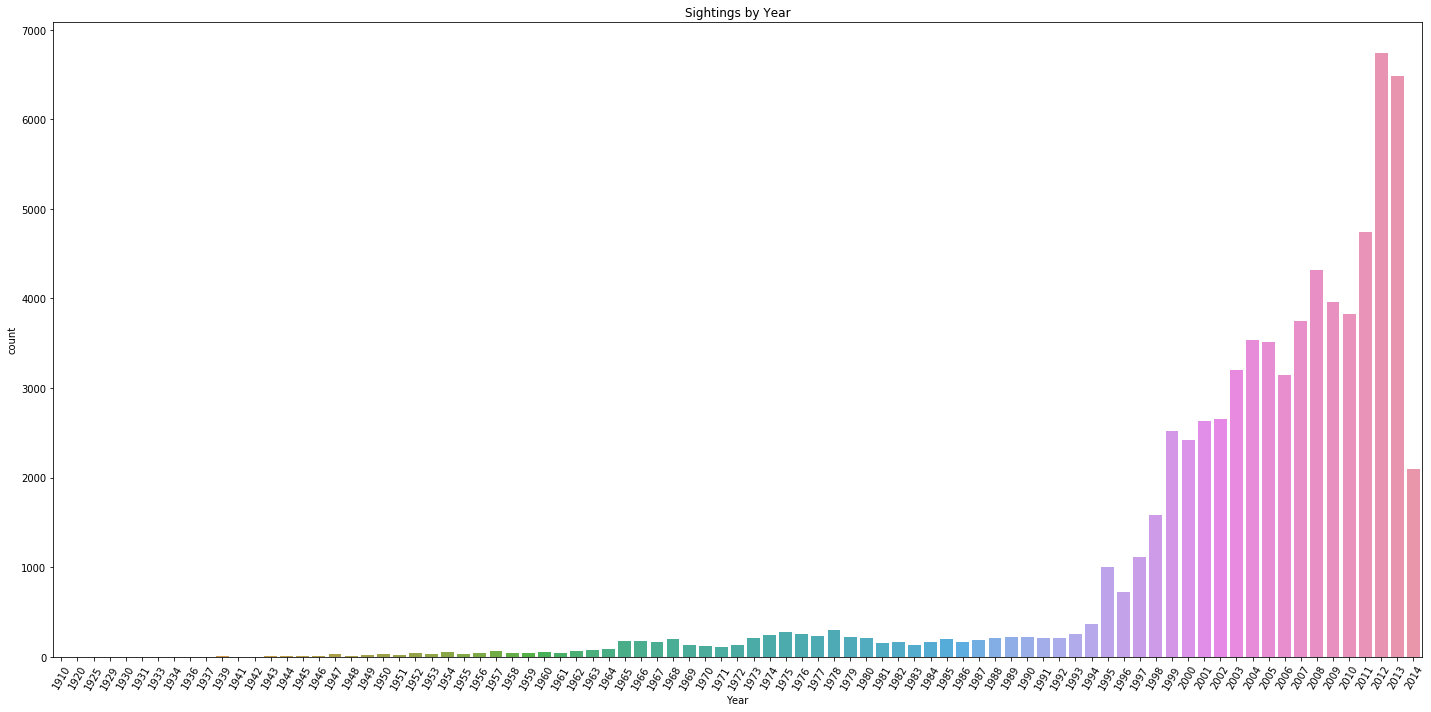

In [457]:
f, ax = plt.subplots(figsize=(20, 10))
plt_year = sns.countplot(x="Year", data=ufo)
plt.xticks(rotation = 60)
plt.title("Sightings by Year")
plt.tight_layout()

Most of the sightings started happening in the mid nineties, few possible reasons: 

It was easier to report due to technological development in communications.

More free time for sightseeing.

Maybe a domino effect since people became more open to share sightings.

Some suggest media like Tv shows and movies had an effect on this as well.

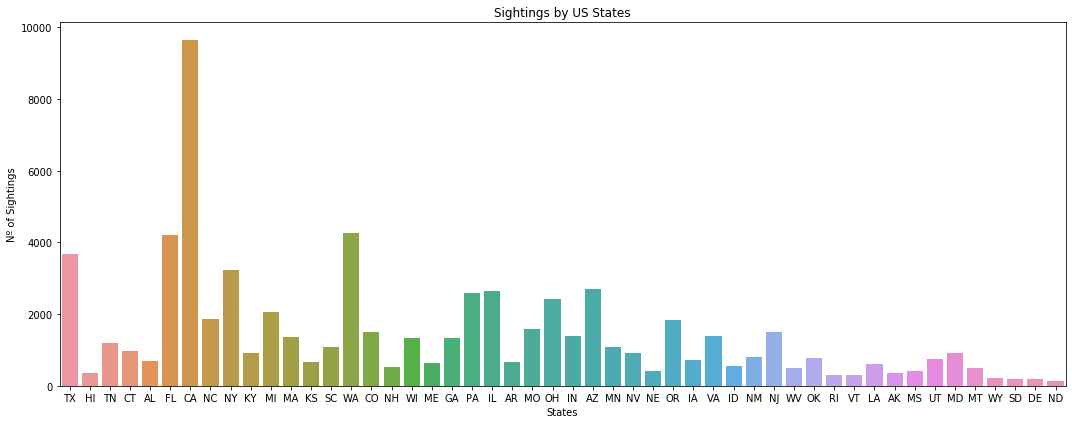

In [458]:
f, ax = plt.subplots(figsize=(15, 6))
plt_year = sns.countplot(x="state", data=ufo)
plt.title("Sightings by US States")
plt.xlabel('States')
plt.ylabel('Nº of Sightings')
plt.tight_layout()

Sightings are mostly frequent in Californi, Wyoming, Florida, Texas and New York. Keep in consideration that these states have higher population, which can skew the data in their favor.

In [459]:
ufo["state"].value_counts().head(10)

CA    9654
WA    4265
FL    4200
TX    3676
NY    3219
AZ    2689
IL    2645
PA    2582
OH    2423
MI    2070
Name: state, dtype: int64

Check the months in order to see if there is some seasonality

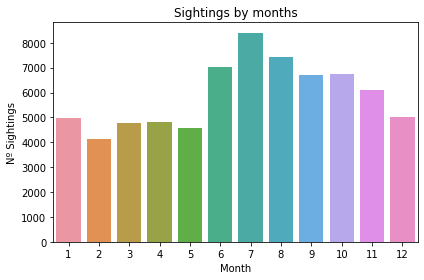

In [460]:
plt_month = sns.countplot(x="Month", data=ufo)
plt.title("Sightings by months")
plt.xlabel('Month')
plt.ylabel('Nº Sightings')
plt.tight_layout()

Possible due to warmed months and warmer nights people spend more time outside and in the nature (hiking, camping, partying), clearer skies and more ufo phenomenons can be registered. Or summer is the holiday seasons in Andromeda Galaxy and we receive more visits :).


How about the time of sightings?

In [461]:
#First group by Hour and Day of week
#Pick only ona column like country for example, just
#Unstack in order to put the innermost index in the columns 
hour_by_day = ufo.groupby(by=["Hour", "Day of week"]).count()["country"].unstack()

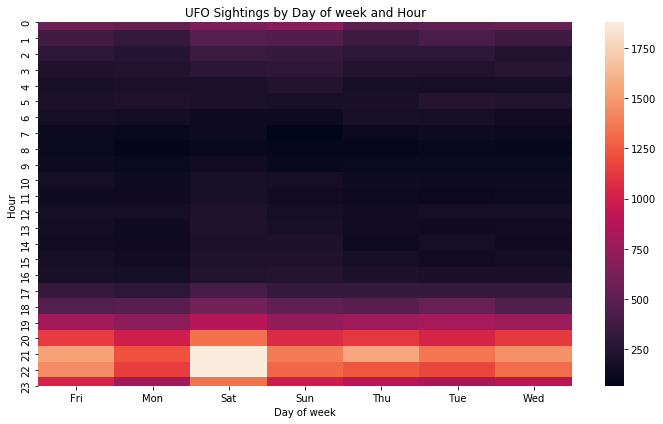

In [462]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data=hour_by_day, fmt="d")
plt.title('UFO Sightings by Day of week and Hour')
plt.tight_layout()

By this figure, few things stand out, 1- Night sightings are the most common (not surprising), ocurring betweem 20h-23h. But the most interesting is the day of week: Friday and Saturday, which could be explained by people going out more either on campings, hikes, to parties or just spend more time outside.

Explore the most commong shape sightings to get a better idea of what people see

In [463]:
shape_data = ufo["shape"].value_counts()
shape_index = shape_data.index
shape_counts = shape_data.to_numpy()

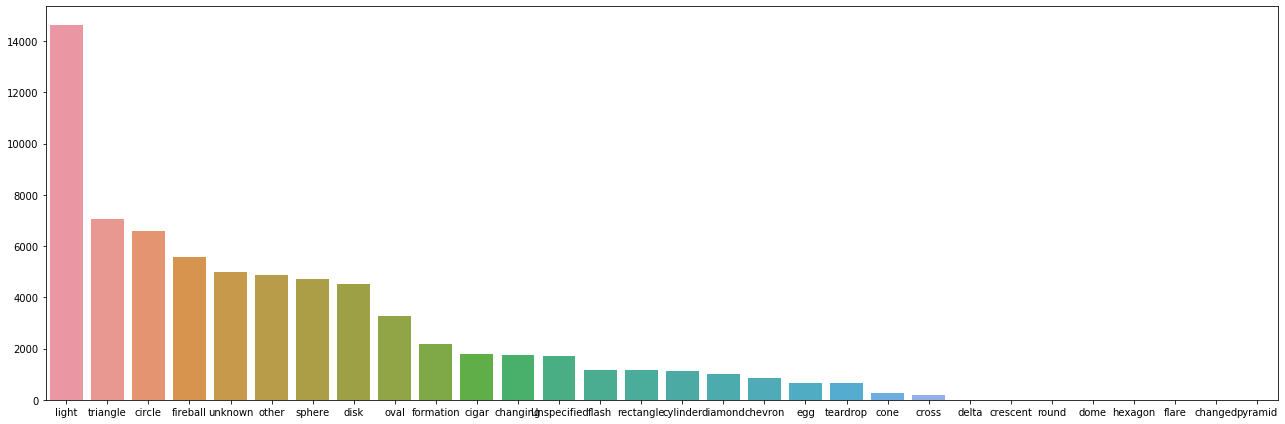

In [464]:
f, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x=shape_index, y=shape_counts)
plt.tight_layout()

Most of cases look like some king of circular-spherical shapes: light-circle-sphere-oval-egg-teardrop. Also quite a lot of Unknown data, probably weird phenomemon could have confused people, making them unable to explain what they saw.